# Model Test

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning packages
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

In [2]:
# Set picture size for consitency
pic_size = 48
path = 'images/'

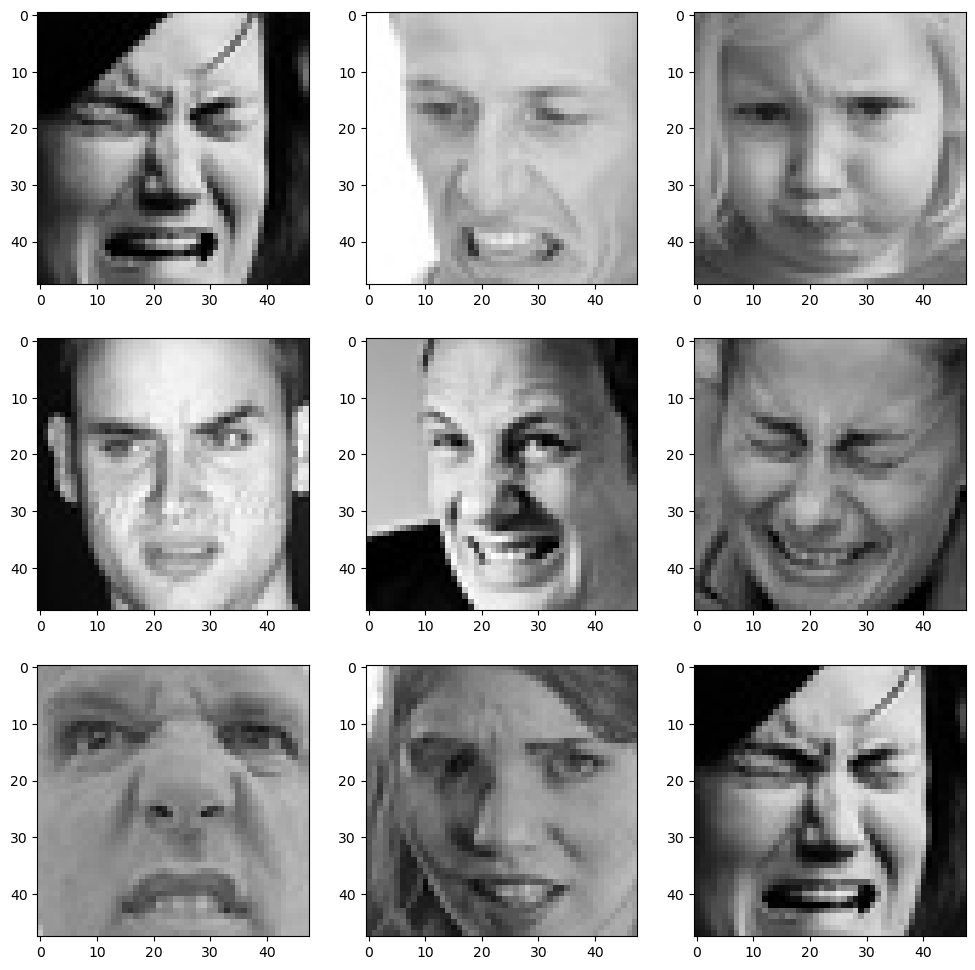

In [3]:
# Show different pictures from data
expression = 'disgust'

plt.figure(figsize = (12, 12))
# Loop over images
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    # Load img from training folder and "expression" and display them
    img = load_img(path + "train/" + expression + "/" + os.listdir(path + "train/" + expression)[i],
                   target_size = (pic_size, pic_size))
    plt.imshow(img)   
plt.show()

In [10]:
# Set batch size for consitency
batch_size  = 128
# Data generator for training data with augmentation
datagen_train = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest') 
# Data generator for validation data without augmentation
datagen_val = ImageDataGenerator(
    rescale = 1. / 255)

# Set flow from directory to get train and val data
train_data = datagen_train.flow_from_directory(path + 'train',
                                              target_size = (pic_size,pic_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)
test_data = datagen_val.flow_from_directory(path + 'validation',
                                            target_size = (pic_size, pic_size),
                                            color_mode = 'grayscale',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Models

### Model from Video

In [11]:
# Sequential model
model = Sequential()

# 1st layer
model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
#2st layer
model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
#3rd layer
model.add(Conv2D(512, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
# 4th layer
model.add(Conv2D(512, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.4))
# Flattening
model.add(Flatten())
# Fully connected layers
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
# Output layer 7 different moods
model.add(Dense(7, activation = 'softmax'))
# Compile model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [12]:
# Import packages needed for callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Setting up early stopping
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    patience = 3,
    verbose = 1,
    restore_best_weights = True)
# Setting up reduced lr on plateu
reduce_learningrate = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.2,
    patience = 3,
    verbose = 1,
    min_delta = 0.0001)

callbacks = [early_stopping, reduce_learningrate]
# Fit model with callbacks and parameters
history = model.fit(
    train_data,
    steps_per_epoch = train_data.samples // batch_size,
    batch_size = batch_size,
    epochs = 100, 
    validation_data = test_data,
    validation_steps = test_data.samples // batch_size,
    callbacks = callbacks)           

Epoch 1/100
225/225 [==============================] - 22s 86ms/step - loss: 1.8257 - accuracy: 0.2441 - val_loss: 1.8102 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 2/100
225/225 [==============================] - 19s 83ms/step - loss: 1.8151 - accuracy: 0.2481 - val_loss: 1.8025 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 3/100
225/225 [==============================] - 19s 85ms/step - loss: 1.7999 - accuracy: 0.2501 - val_loss: 1.7939 - val_accuracy: 0.2615 - lr: 0.0010
Epoch 4/100
225/225 [==============================] - 19s 83ms/step - loss: 1.7752 - accuracy: 0.2617 - val_loss: 1.7108 - val_accuracy: 0.3054 - lr: 0.0010
Epoch 5/100
225/225 [==============================] - 19s 83ms/step - loss: 1.7372 - accuracy: 0.2811 - val_loss: 1.6757 - val_accuracy: 0.3141 - lr: 0.0010
Epoch 6/100
225/225 [==============================] - 19s 86ms/step - loss: 1.7056 - accuracy: 0.3041 - val_loss: 1.6234 - val_accuracy: 0.3497 - lr: 0.0010
Epoch 7/100
225/225 [==============================]

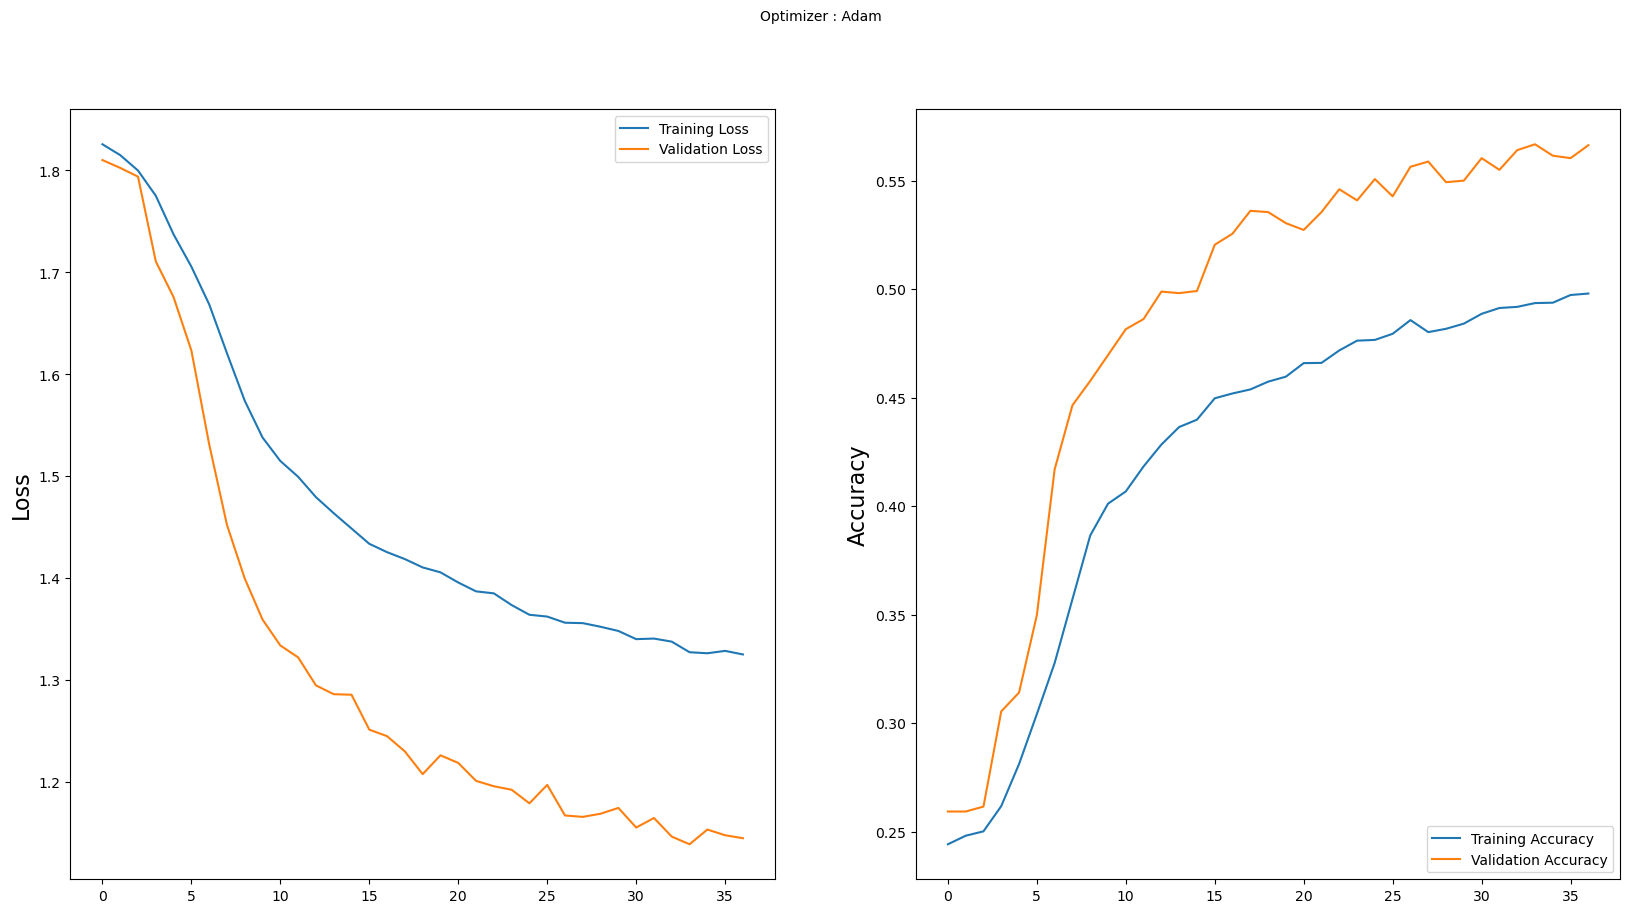

In [13]:
# Plot loss for model
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
# Plot accuracy for model
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

### Model structure found online for same task

In [14]:
# Trying a different model
model_2 = Sequential()
#1st layer
model_2.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (48, 48, 1)))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))
#2nd layer
model_2.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))
#3rd layer
model_2.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))
#flattening
model_2.add(Flatten())
# Fully connected layers
model_2.add(Dense(256, activation = 'relu'))
model_2.add(Dropout(0.5))
# Output layer for binary classification
model_2.add(Dense(7, activation = 'softmax'))
# Model compilation
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Fit model 2, using same callbacks as previous model
history_2 = model_2.fit(
    train_data,
    steps_per_epoch = train_data.samples // batch_size,
    batch_size = batch_size,
    epochs = 100, 
    validation_data = test_data,
    validation_steps = test_data.samples // batch_size,
    callbacks = callbacks)

Epoch 1/100
225/225 [==============================] - 20s 85ms/step - loss: 1.8085 - accuracy: 0.2449 - val_loss: 1.7535 - val_accuracy: 0.2805 - lr: 0.0010
Epoch 2/100
225/225 [==============================] - 19s 83ms/step - loss: 1.7380 - accuracy: 0.2880 - val_loss: 1.6603 - val_accuracy: 0.3433 - lr: 0.0010
Epoch 3/100
225/225 [==============================] - 19s 84ms/step - loss: 1.6701 - accuracy: 0.3334 - val_loss: 1.5187 - val_accuracy: 0.4112 - lr: 0.0010
Epoch 4/100
225/225 [==============================] - 19s 86ms/step - loss: 1.5947 - accuracy: 0.3763 - val_loss: 1.4485 - val_accuracy: 0.4484 - lr: 0.0010
Epoch 5/100
225/225 [==============================] - 19s 84ms/step - loss: 1.5352 - accuracy: 0.4021 - val_loss: 1.3597 - val_accuracy: 0.4702 - lr: 0.0010
Epoch 6/100
225/225 [==============================] - 20s 87ms/step - loss: 1.4892 - accuracy: 0.4240 - val_loss: 1.3175 - val_accuracy: 0.5080 - lr: 0.0010
Epoch 7/100
225/225 [==============================]

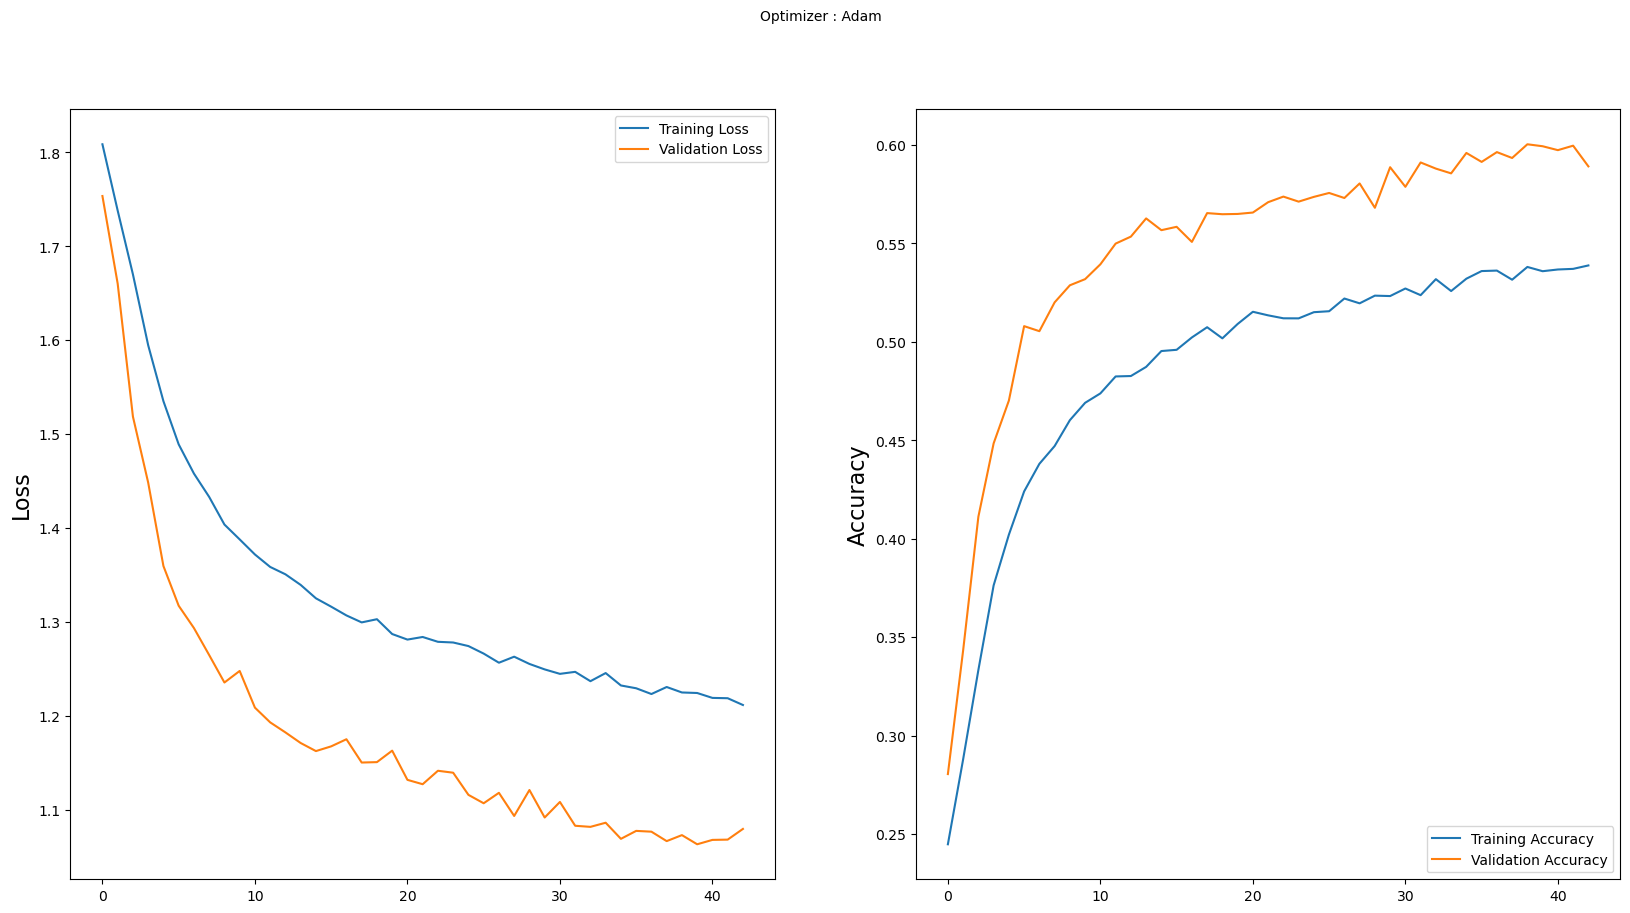

In [16]:
# Plot loss for model 2
plt.figure(figsize= (20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(history_2.history['loss'], label = 'Training Loss')
plt.plot(history_2.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
# Plot accuracy for model 2
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(history_2.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [17]:
# Save model with trained weights so training is not required again
model_2.save('emotion_detector.h5')

# Teori frågor

1.	Utmaningar du haft under arbetet samt hur du hanterat dem. 
Under arbetet har jag stött på lite olika utmaningar, att få modellen att prestera bättre än i videon vilket uppnådes genom att testa en ny modell struktur som visade sig ge bättre resultat. Detta är en komplex modell att använda i praktiken då vi alla visar känslor på olika sätt och att uppnå ett bra resultat blir svårare. Genom att testa olika modeller kunde slutligen en modell användas som gav rätt så bra resultat (cirka 60% accuracy). 
2.	Vilket betyg du anser att du skall ha och varför. 
Jag anser att jag ska ha VG eftersom jag har testat olika modell strukturer och sedan implementerat den bäst fungerande i realtid genom webkameran. Jag har även fördjupat mig och skapat en ansiktsigenkännings funktion som kan tänkas appliceras för tillgång till en app eller något liknande.
3.	Tips du hade ”gett till dig själv” i början av kursen nu när du slutfört den. 
Lägga mer tid på hyper parameter tuning och förbättring av modellen för att försöka uppnå bättre resultat. Tillräckligt bra resultat för att vara nöjd uppnåddes men de kunde förbättrats ytterligare.
